## Tox 21 dataset exploration



In [1]:
import logging
from chainer_chemistry import datasets

# show INFO level log from chainer chemistry
logging.basicConfig(level=logging.INFO)

label_names = datasets.get_tox21_label_names()
print('tox21 label_names = ', label_names)

tox21 label_names =  ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


In [2]:
from chainer_chemistry.dataset.preprocessors.nfp_preprocessor import \
    NFPPreprocessor

preprocessor = NFPPreprocessor()
train, val, test, train_smiles, val_smiles, test_smiles = datasets.get_tox21(preprocessor, labels=None, retain_smiles=True)

100%|██████████| 11764/11764 [00:27<00:00, 431.42it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 11757, TOTAL 11757
100%|██████████| 296/296 [00:01<00:00, 251.07it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 295, TOTAL 295
100%|██████████| 647/647 [00:01<00:00, 347.08it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 645, TOTAL 645


In [4]:
from chainer_chemistry.dataset.preprocessors.ggnn_preprocessor import \
    GGNNPreprocessor

preprocessor = GGNNPreprocessor()
train, val, test, train_smiles, val_smiles, test_smiles = datasets.get_tox21(preprocessor, labels=None, retain_smiles=True)

100%|██████████| 11764/11764 [00:21<00:00, 558.80it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 11757, TOTAL 11757
100%|██████████| 296/296 [00:00<00:00, 442.45it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 295, TOTAL 295
100%|██████████| 647/647 [00:01<00:00, 599.64it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 0, SUCCESS 645, TOTAL 645


In [3]:
print('train', len(train), len(train_smiles))
print('val', len(val), len(val))
print('test', len(test), len(test))

train 11757 11757
val 295 295
test 645 645


In [3]:
index = 34

print('index={}, SMILES={}'.format(index, train_smiles[index]))
atom, adj, labels = train[index]
print('atom', atom)
print('adj', adj)
print('labels', labels)

index=34, SMILES=COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1
atom [6 8 6 6 6 6 6 6 7 6 6 6 7 6 7 6 6 6 6 6 6 7 6 6 6 6 6 9 6 6 6 6 6 6]
adj [[ 1.  1.  0. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  1. ...,  0.  1.  1.]]
labels [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [6]:
from ipywidgets import interact

def show_dataset(index):
    print('index={}, SMILES={}'.format(index, train_smiles[index]))
    atom, adj, labels = train[index]
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)

interact(show_dataset, index=(0, len(train) - 1, 1))

index=11756, SMILES=CCC(COC(=O)CCS)(COC(=O)CCS)COC(=O)CCS
atom [ 6  6  6  6  8  6  8  6  6 16  6  8  6  8  6  6 16  6  8  6  8  6  6 16]
labels [0 0 0 0 0 0 0 0 0 0 0 1]


In [13]:
%matplotlib inline
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell

from rdkit import Chem

mol = Chem.MolFromSmiles(train_smiles[index])
mol

drawing 34


In [19]:
# http://rdkit.blogspot.jp/2015/02/new-drawing-code.html
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

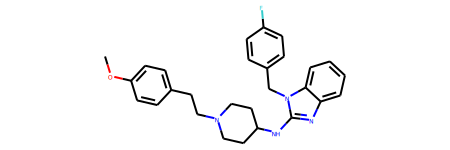

In [18]:
SVG(moltosvg(mol))

index=3895, SMILES=CCCCOc1ccc(C(=O)CCN2CCCCC2)cc1.Cl
atom [ 6  6  6  6  8  6  6  6  6  6  8  6  6  7  6  6  6  6  6  6  6 17]
labels [ 0  0  0 -1  1  0  0 -1 -1 -1  0  0]


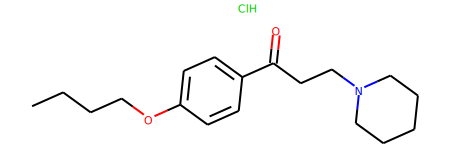

In [22]:
def show_dataset(index):
    print('index={}, SMILES={}'.format(index, train_smiles[index]))
    atom, adj, labels = train[index]
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)
    mol = Chem.MolFromSmiles(train_smiles[index])
    return SVG(moltosvg(mol))

interact(show_dataset, index=(0, len(train) - 1, 1))

In [30]:
from rdkit.Chem import Draw
index = 7381
print('drawing {}'.format(index))
mol = Chem.MolFromSmiles(train_smiles[index])
Draw.MolToFile(mol, 'mol_{}.png'.format(index), size=(600, 600))



drawing 7381


In [ ]:
2948, 3895, 6558, 7381